In [1]:
import pandas as pd
import numpy as np

import requests

import import_ipynb
from FunctionToReadData import read_data


In [ ]:
# import requests
# from io import StringIO
# import pandas as pd

# url=""
# resp = requests.get(url)
# data = StringIO(resp.text)
# df = pd.read_csv(data)
# df.to_csv('trainDXGM.csv', index=False)

In [ ]:
# url=""
# resp = requests.get(url)
# data = StringIO(resp.text)
# df = pd.read_csv(data)
# df.to_csv('test_predsDXGM', index=False)

In [4]:
train_data = read_data('trainDXGM.csv')
test_data = read_data('test_predsDXGM.csv')

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 30 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   LOAN_ID                        250000 non-null  object        
 1   MONTHLY_REPORTING_PERIOD       250000 non-null  datetime64[ns]
 2   CHANNEL                        250000 non-null  object        
 3   ORIGINAL_INTEREST_RATE         250000 non-null  float64       
 4   CURRENT_INTEREST_RATE          249994 non-null  float64       
 5   ORIGINAL_UPB                   250000 non-null  float64       
 6   ORIGINAL_LOAN_TERM             250000 non-null  float64       
 7   ORIGINATION_DATE               250000 non-null  datetime64[ns]
 8   FIRST_PAYMENT_DATE             250000 non-null  datetime64[ns]
 9   LOAN_AGE                       249994 non-null  float64       
 10  REM_MONTHS_LEGAL_MATURITY      249994 non-null  float64       
 11  

In [6]:
train_data.isnull().mean() * 100

LOAN_ID                           0.0000
MONTHLY_REPORTING_PERIOD          0.0000
CHANNEL                           0.0000
ORIGINAL_INTEREST_RATE            0.0000
CURRENT_INTEREST_RATE             0.0024
ORIGINAL_UPB                      0.0000
ORIGINAL_LOAN_TERM                0.0000
ORIGINATION_DATE                  0.0000
FIRST_PAYMENT_DATE                0.0000
LOAN_AGE                          0.0024
REM_MONTHS_LEGAL_MATURITY         0.0024
REM_MONTHS_MATURITY               0.0024
MATURITY_DATE                     0.0024
LTV                               0.0000
CLTV                              1.7744
NUMBER_OF_BORROWERS               0.0508
DTI                               3.5768
B_CREDIT_SCORE_O                  0.7840
CB_CREDIT_SCORE_O                53.9724
FIRST_TIME_HOME_BUYER_IND         0.1008
LOAN_PURPOSE                      0.0000
PROPERTY_TYPE                     0.0000
NUMBER_OF_UNITS                   0.0000
OCCUPANCY_STATUS                  0.0000
PROPERTY_STATE  

In [7]:
train_data = train_data.drop(['CB_CREDIT_SCORE_O','MORTGAGE_INSURANCE_PERCENTAGE'],axis=1) #Dropping columns that have too many missing values
test_data = test_data.drop(['CB_CREDIT_SCORE_O','MORTGAGE_INSURANCE_PERCENTAGE'],axis=1) #Dropping columns that have too many missing values

In [8]:
train_data['ZIP_CODE_SHORT'] = train_data['ZIP_CODE_SHORT'].astype(int)
test_data['ZIP_CODE_SHORT'] = test_data['ZIP_CODE_SHORT'].astype(int)

# Regression for NMonths

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [11]:
X = train_data.drop(columns=['NMONTHS', 'LOAN_ID','FORECLOSURE'])  # Exclude target and LOAN_ID for now
y = train_data['NMONTHS']#.to_frame()
X

,MONTHLY_REPORTING_PERIOD,CHANNEL,ORIGINAL_INTEREST_RATE,CURRENT_INTEREST_RATE,ORIGINAL_UPB,ORIGINAL_LOAN_TERM,ORIGINATION_DATE,FIRST_PAYMENT_DATE,LOAN_AGE,REM_MONTHS_LEGAL_MATURITY,...,DTI,B_CREDIT_SCORE_O,FIRST_TIME_HOME_BUYER_IND,LOAN_PURPOSE,PROPERTY_TYPE,NUMBER_OF_UNITS,OCCUPANCY_STATUS,PROPERTY_STATE,MSA,ZIP_CODE_SHORT
0,2001-12-01,B,6.250,6.250,257000.0,360.0,2001-11-01,2002-01-01,0.0,360.0,...,NaN,697.0,N,R,PU,1.0,P,NV,29820.0,891
1,2002-12-01,R,6.000,6.000,144000.0,360.0,2002-11-01,2003-01-01,0.0,360.0,...,37.0,655.0,N,C,PU,1.0,P,OK,36420.0,730
2,2006-08-01,B,6.375,6.375,265000.0,360.0,2006-06-01,2006-08-01,1.0,359.0,...,43.0,720.0,N,P,SF,1.0,P,PA,38300.0,152
3,2002-11-01,C,6.250,6.250,147000.0,360.0,2002-09-01,2002-11-01,1.0,359.0,...,37.0,624.0,N,P,PU,1.0,P,PA,0.0,172
4,2006-02-01,C,6.125,6.125,384000.0,360.0,2005-12-01,2006-02-01,1.0,359.0,...,56.0,665.0,N,P,PU,1.0,P,SC,43900.0,293
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,2002-01-01,R,6.000,6.000,131000.0,120.0,2001-12-01,2002-02-01,0.0,120.0,...,26.0,764.0,N,R,PU,1.0,P,CO,19740.0,801
249996,2001-01-01,R,7.875,7.875,237000.0,360.0,2000-12-01,2001-02-01,0.0,360.0,...,57.0,607.0,N,C,CO,1.0,P,MA,14460.0,21
249997,2002-10-01,B,5.625,5.625,154000.0,180.0,2002-09-01,2002-11-01,0.0,180.0,...,56.0,766.0,N,R,SF,1.0,P,NC,16740.0,280
249998,2003-01-01,R,5.625,5.625,213000.0,180.0,2002-10-01,2002-12-01,2.0,178.0,...,42.0,691.0,N,C,SF,1.0,P,TN,34980.0,371


In [12]:
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
date_cols = X.select_dtypes(include=['datetime64[ns]']).columns

categorical_cols

Index(['CHANNEL', 'FIRST_TIME_HOME_BUYER_IND', 'LOAN_PURPOSE', 'PROPERTY_TYPE',
       'OCCUPANCY_STATUS', 'PROPERTY_STATE'],
      dtype='object')

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

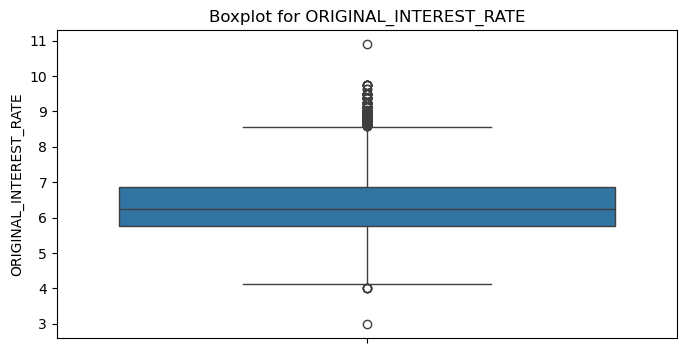

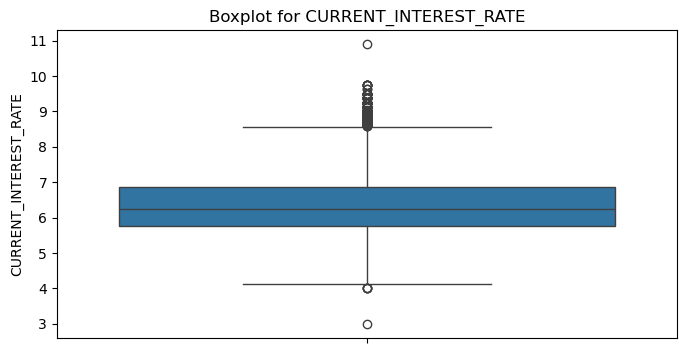

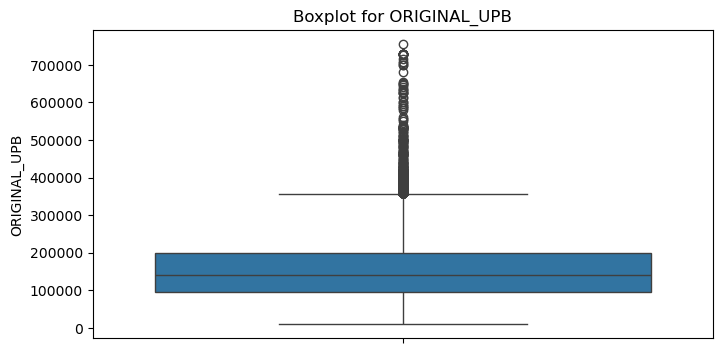

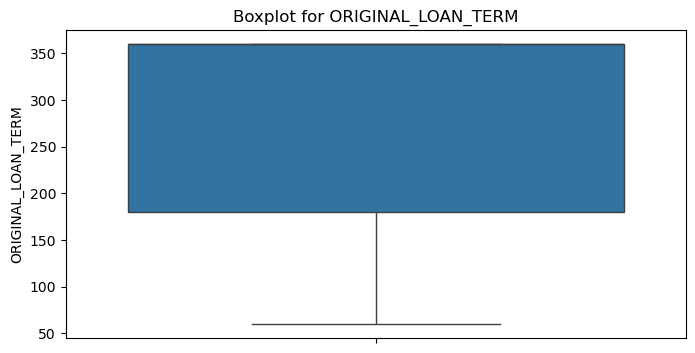

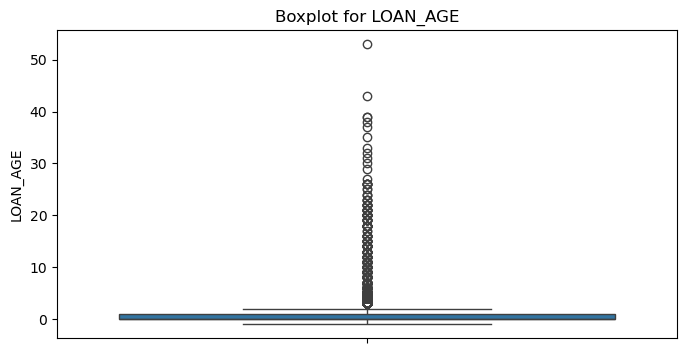

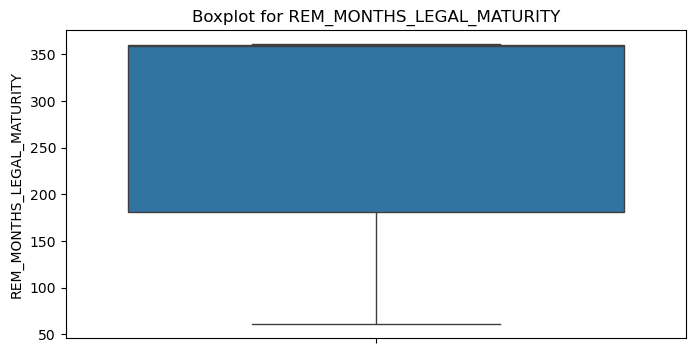

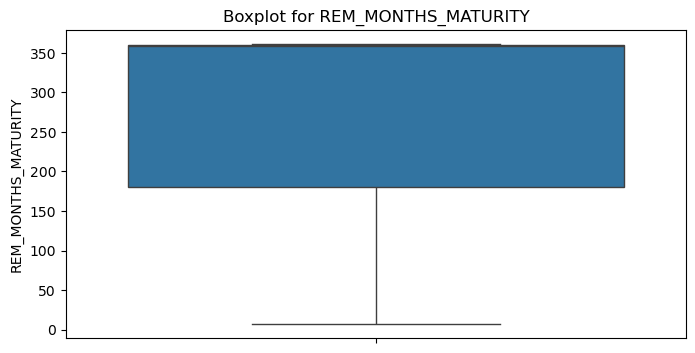

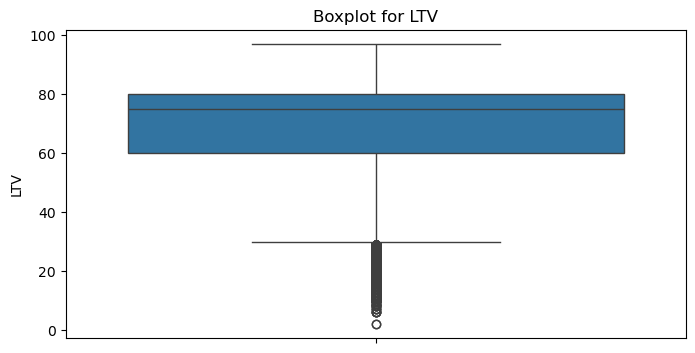

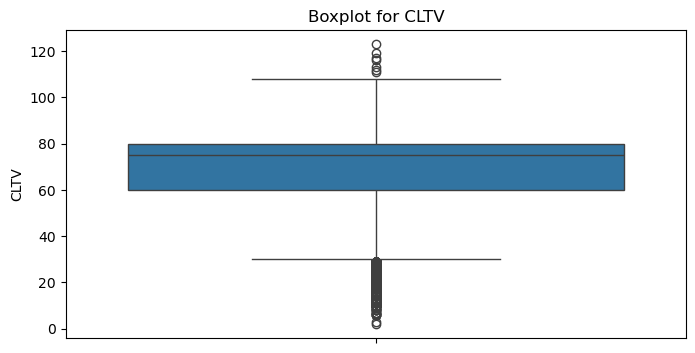

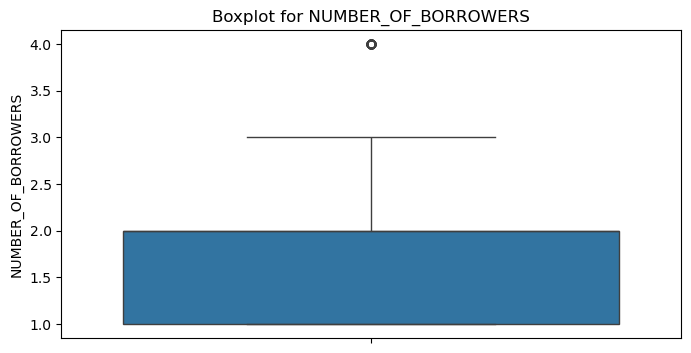

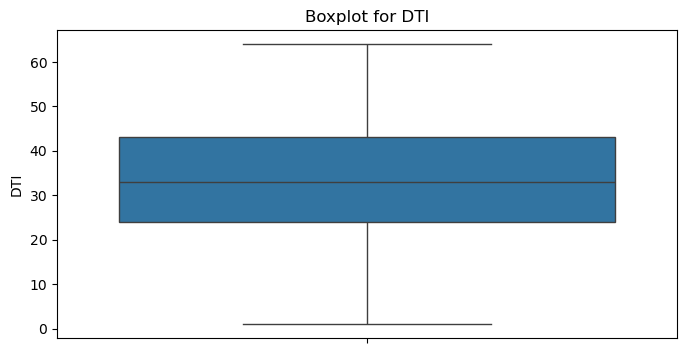

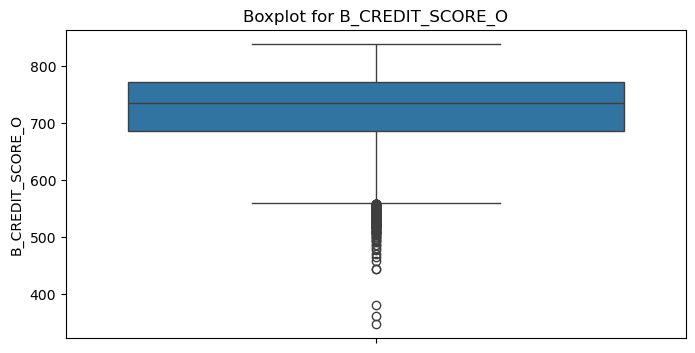

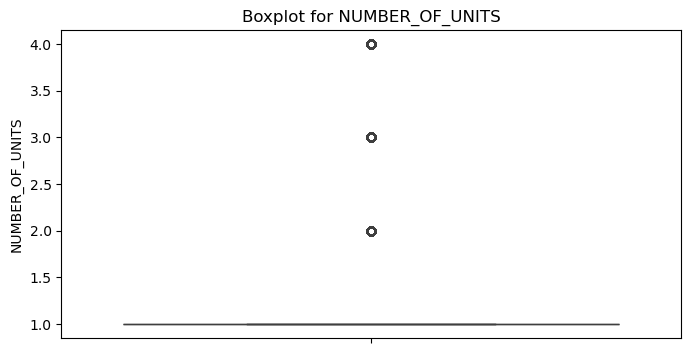

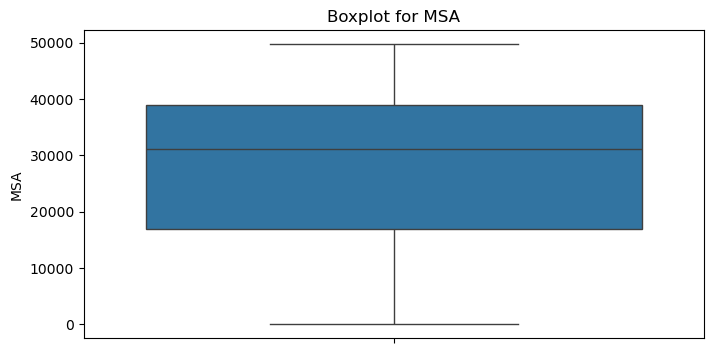

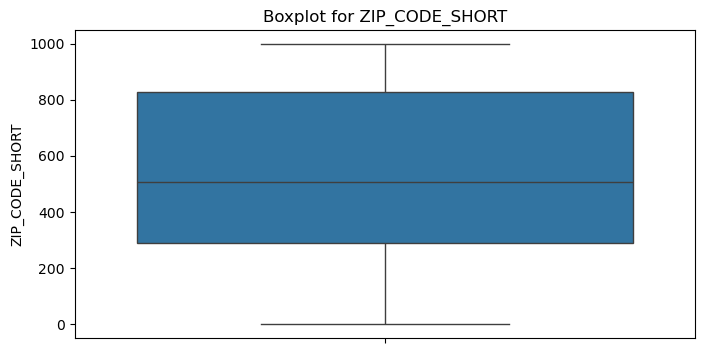

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of columns to check
columns_to_check = numerical_cols

for column in columns_to_check:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=X_test[column])
    plt.title(f'Boxplot for {column}')
    plt.show()

In [15]:
print("Q3: Mean of NMONTHS in the training set is", round(y_train.mean(),3))

Q3: Mean of NMONTHS in the training set is 58.675


In [16]:
def process_date_cols(X_train, X_test):
    processed_data_train = X_train.copy()
    processed_data_test = X_test.copy()
    
    for col in date_cols:
        # Convert to datetime
        processed_data_train[col] = pd.to_datetime(processed_data_train[col], errors='coerce')
        processed_data_test[col] = pd.to_datetime(processed_data_test[col], errors='coerce')

        default_date = processed_data_train[col].median() 
        processed_data_train[col] = processed_data_train[col].fillna(default_date)
        processed_data_test[col] = processed_data_test[col].fillna(default_date)
        
        # Extract features
        processed_data_train[f'{col}_YEAR'] = processed_data_train[col].dt.year
        processed_data_train[f'{col}_MONTH'] = processed_data_train[col].dt.month
        processed_data_train[f'{col}_DAY'] = processed_data_train[col].dt.day

        processed_data_test[f'{col}_YEAR'] = processed_data_test[col].dt.year
        processed_data_test[f'{col}_MONTH'] = processed_data_test[col].dt.month
        processed_data_test[f'{col}_DAY'] = processed_data_test[col].dt.day

        
    # Drop the original date columns
    processed_data_train = processed_data_train.drop(columns=date_cols)
    processed_data_test = processed_data_test.drop(columns=date_cols)
    
    return processed_data_train, processed_data_test

In [17]:
def process_numerical_cols(X_train, X_test):
    processed_data_train = X_train.copy()
    processed_data_test = X_test.copy()

    extreme_outliers_train = ['CURRENT_INTEREST_RATE', 'LOAN_AGE','CLTV','NUMBER_OF_BORROWERS','B_CREDIT_SCORE_O']
    remaining_cols_train = ['REM_MONTHS_LEGAL_MATURITY', 'REM_MONTHS_MATURITY',  'DTI']

    extreme_outliers_test = ['CURRENT_INTEREST_RATE', 'LOAN_AGE','CLTV','B_CREDIT_SCORE_O']
    remaining_cols_test = ['REM_MONTHS_LEGAL_MATURITY', 'REM_MONTHS_MATURITY','NUMBER_OF_BORROWERS','DTI']


    for col in extreme_outliers_train:
        processed_data_train.fillna({col: processed_data_train[col].median()}, inplace=True)
        processed_data_test.fillna({col: processed_data_train[col].median()}, inplace=True)
        
    for col in remaining_cols_train:
        processed_data_train.fillna({col: processed_data_train[col].mean()}, inplace=True)
        processed_data_test.fillna({col: processed_data_train[col].mean()}, inplace=True)
    
    return processed_data_train, processed_data_test



In [18]:
def process_categorical_cols(X_train, X_test):
    processed_data_train = X_train.copy()
    processed_data_test = X_test.copy()

    for col in categorical_cols:
        processed_data_train.fillna({col : processed_data_train[col].mode()[0]}, inplace=True)
        processed_data_test.fillna({col : processed_data_train[col].mode()[0]}, inplace=True)

    encoded_train = pd.get_dummies(processed_data_train, columns=categorical_cols)
    encoded_test = pd.get_dummies(processed_data_test, columns=categorical_cols)
    
    return encoded_train, encoded_test

In [19]:
#X_train.info(), X_test.info()

In [20]:
X_train_trans, X_test_trans = process_numerical_cols(X_train,X_test)
print(X_test.shape)
#X_train_trans.info(), X_test_trans.info()
#X_test_trans

(50000, 25)


In [21]:
X_train_date, X_test_date = process_date_cols(X_train_trans, X_test_trans)
#X_train_date.info(), X_test_date.info()

In [22]:
X_train_encoded, X_test_encoded  = process_categorical_cols(X_train_date, X_test_date)
#X_train_encoded.info(), X_test_encoded.info()

#### PCA for dimensionality reduction

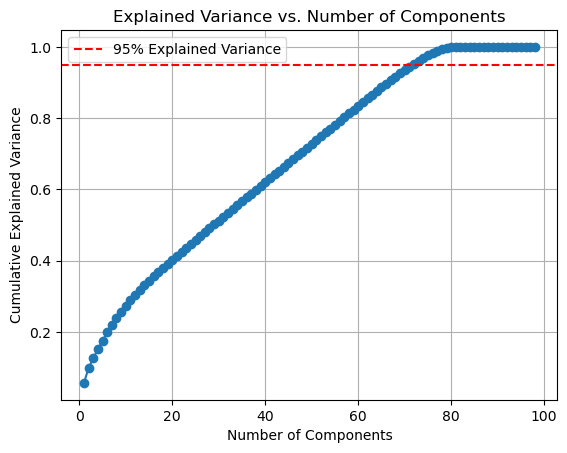

Number of components for 95% variance: 72


In [24]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_test_scaled = scaler.fit_transform(X_test_encoded)

# Apply PCA
pca = PCA()
pca.fit(X_train_scaled)

# Calculate cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot cumulative explained variance
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.legend()
plt.grid()
plt.show()

# Find the number of components that explain at least 95% variance
n_components = np.argmax(cumulative_variance >= 0.95) + 1
print(f"Number of components for 95% variance: {n_components}")


In [25]:
# Initialize PCA and retain a specified number of components
pca = PCA(n_components=72)  

# Fit PCA on training data and transform both train and test sets
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Explained variance ratio
print(f"Explained variance by top 72 components: {np.sum(pca.explained_variance_ratio_):.2f}")


Explained variance by top 72 components: 0.95


In [26]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, BayesianRidge, HuberRegressor, GammaRegressor

model =  GammaRegressor()
model.fit(X_train_pca,y_train)
y_pred= model.predict(X_test_pca)

mse = round(mean_squared_error(y_test, y_pred),3)
mae = round(mean_absolute_error(y_test, y_pred),3)
r2 = round(r2_score(y_test, y_pred),3)
rmse = round(np.sqrt(mean_squared_error(y_test, y_pred)),3)
print(" Mean Squared Error (MSE) NMONTHS: ", mse,"\n", "Root Mean Squared Error (RMSE) NMONTHS: ", rmse,"\n",  "R2 Value NMONTHS: ", r2)

 Mean Squared Error (MSE) NMONTHS:  2393.151 
 Root Mean Squared Error (RMSE) NMONTHS:  48.92 
 R2 Value NMONTHS:  0.124


In [27]:
print("Q5: Mean Absolute Error (MAE) NMONTHS is", mae,)



Q5: Mean Absolute Error (MAE) NMONTHS is 37.684


In [28]:
(y_pred<0).sum()

0

In [29]:
print("Mean value of NMONTHS predicted with train data:", round(y_pred.mean(),3))

Mean value of NMONTHS predicted with train data: 57.253


#### Prediction on test data

In [31]:
test_data_loan = test_data.drop(['LOAN_ID'], axis=1)

In [32]:
empty_df = pd.DataFrame()

test_nume, _ = process_numerical_cols(test_data_loan, test_data_loan)
test_date, _ = process_date_cols(test_nume,test_nume)
test_encoded, _ = process_categorical_cols(test_date, test_date)

test_encoded


,ORIGINAL_INTEREST_RATE,CURRENT_INTEREST_RATE,ORIGINAL_UPB,ORIGINAL_LOAN_TERM,LOAN_AGE,REM_MONTHS_LEGAL_MATURITY,REM_MONTHS_MATURITY,LTV,CLTV,NUMBER_OF_BORROWERS,...,PROPERTY_STATE_TN,PROPERTY_STATE_TX,PROPERTY_STATE_UT,PROPERTY_STATE_VA,PROPERTY_STATE_VI,PROPERTY_STATE_VT,PROPERTY_STATE_WA,PROPERTY_STATE_WI,PROPERTY_STATE_WV,PROPERTY_STATE_WY
0,6.875,6.875,191000.0,360.0,0.0,360.0,359.0,95.0,95.0,2.0,...,False,False,False,False,False,False,False,False,False,False
1,7.000,7.000,396000.0,360.0,1.0,359.0,359.0,80.0,95.0,2.0,...,False,False,False,False,False,False,False,False,False,False
2,6.000,6.000,134000.0,240.0,2.0,238.0,238.0,68.0,68.0,2.0,...,False,False,False,False,False,False,False,False,False,False
3,5.250,5.250,101000.0,360.0,1.0,359.0,358.0,76.0,76.0,2.0,...,False,False,False,False,False,False,True,False,False,False
4,8.250,8.250,49000.0,360.0,0.0,360.0,359.0,79.0,75.0,2.0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,6.750,6.750,401000.0,360.0,0.0,360.0,360.0,66.0,66.0,2.0,...,False,False,False,False,False,False,False,False,False,False
99996,4.250,4.250,80000.0,120.0,0.0,120.0,118.0,61.0,61.0,1.0,...,False,False,False,False,False,False,False,False,False,False
99997,5.625,5.625,73000.0,360.0,0.0,360.0,360.0,61.0,61.0,1.0,...,False,False,False,False,False,False,False,False,False,False
99998,6.875,6.875,39000.0,360.0,1.0,359.0,336.0,25.0,25.0,3.0,...,False,False,False,False,False,False,False,False,False,False


In [33]:
test_scaled = scaler.fit_transform(test_encoded)
pca = PCA(n_components=72)  

test_pca = pca.fit_transform(test_scaled)

In [34]:
y_pred_test = model.predict(test_pca)
pred_df = pd.DataFrame(y_pred_test)
nmonths_final = pd.DataFrame({'LOAN_ID': test_data['LOAN_ID'], 'NMONTHS':pred_df[0]})
nmonths_final

,LOAN_ID,NMONTHS
0,IHFBJHHDGDFI,42.360306
1,EEGDHHEJEDIE,44.985981
2,CFAJEIHCFDHJ,47.460171
3,JDGHDBFGDGJC,67.924169
4,DCACDHEJCDFB,40.270148
...,...,...
99995,DFGBAABHEFEG,56.511361
99996,JBAHBCGHEFCH,97.096897
99997,CIFFAFJIJFCE,64.740829
99998,CEDDFCDFIBHC,39.068088


In [35]:
(nmonths_final['NMONTHS']<0).sum() #Checking for negative predictions

0

# Logistic Regression for FORECLOSURE

In [37]:
X_c = train_data.drop(columns=['NMONTHS', 'LOAN_ID','FORECLOSURE'])  # Exclude target and LOAN_ID for now
y_c = train_data['FORECLOSURE']#.to_frame()
y_c

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
249995    0.0
249996    0.0
249997    0.0
249998    0.0
249999    0.0
Name: FORECLOSURE, Length: 250000, dtype: float64

In [38]:
X_c_train, X_c_test, y_c_train, y_c_test = train_test_split(X_c, y_c, test_size=0.2, random_state=42)

In [39]:
print("Q2: Number of foreclosures in the training data set is",int(y_c_train.sum()))

Q2: Number of foreclosures in the training data set is 5200


In [40]:
X_c_train_trans, X_c_test_trans = process_numerical_cols(X_c_train,X_c_test)
X_c_train_date, X_c_test_date = process_date_cols(X_c_train_trans, X_c_test_trans)
X_c_train_encoded, X_c_test_encoded  = process_categorical_cols(X_c_train_date, X_c_test_date)

#### PCA for dimensionality reduction

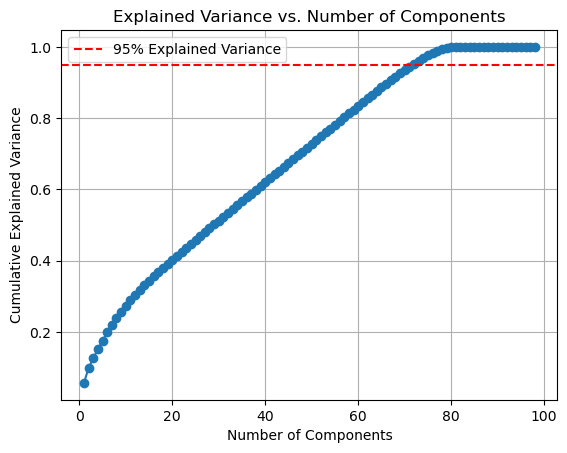

Number of components for 95% variance: 72


In [42]:
scaler = StandardScaler()
X_c_train_scaled = scaler.fit_transform(X_c_train_encoded)
X_c_test_scaled = scaler.fit_transform(X_c_test_encoded)


pca = PCA()
pca.fit(X_c_train_scaled)

cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.legend()
plt.grid()
plt.show()

n_components = np.argmax(cumulative_variance >= 0.95) + 1
print(f"Number of components for 95% variance: {n_components}")


In [43]:

pca = PCA(n_components=72)  

# Fit PCA on training data and transform both train and test sets
X_c_train_pca = pca.fit_transform(X_c_train_scaled)
X_c_test_pca = pca.transform(X_c_test_scaled)


print(f"Explained variance by top 72 components: {np.sum(pca.explained_variance_ratio_):.2f}")


Explained variance by top 72 components: 0.95


#### Logistic Regression Model

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.utils.class_weight import compute_class_weight

model_l = LogisticRegression(random_state=42, max_iter=1000,solver='liblinear',class_weight='balanced')
model_l.fit(X_c_train_pca, y_c_train)
y_pred_l = model_l.predict(X_c_test_pca)
y_pred_prob_l = model_l.predict_proba(X_c_test_pca)[:,1]

In [46]:
sorted_probs_l = np.sort(y_pred_prob_l)[::-1]

threshold_1 = sorted_probs_l[999]

# Apply the threshold
y_pred_prob_l = (y_pred_prob_l >= threshold_1).astype(int)
print(f'Number of foreclosures predicted in train data: {np.sum(y_pred_prob_l)}') 

Number of foreclosures predicted in train data: 1000


In [47]:
from sklearn.metrics import classification_report, roc_auc_score

classification_report = classification_report(y_c_test, y_pred_l,zero_division=0)
roc_auc = roc_auc_score(y_c_test, y_pred_prob_l)
score = model_l.score(X_c_test_pca, y_c_test)

print("Classification Report: ", "\n",classification_report, "\n","ROC_AUC Value: ", roc_auc, "\n", "Score: ", score)

Classification Report:  
               precision    recall  f1-score   support

         0.0       0.99      0.76      0.86     48634
         1.0       0.08      0.80      0.15      1366

    accuracy                           0.76     50000
   macro avg       0.54      0.78      0.51     50000
weighted avg       0.97      0.76      0.84     50000
 
 ROC_AUC Value:  0.5698738134923715 
 Score:  0.75938


#### Prediction on test data

In [49]:
empty_df = pd.DataFrame()

test_nume_logi, _ = process_numerical_cols(test_data_loan, test_data_loan)
test_date_logi, _ = process_date_cols(test_nume_logi,test_nume_logi)
test_encoded_logi, _ = process_categorical_cols(test_date_logi, test_date_logi)

test_encoded_logi


,ORIGINAL_INTEREST_RATE,CURRENT_INTEREST_RATE,ORIGINAL_UPB,ORIGINAL_LOAN_TERM,LOAN_AGE,REM_MONTHS_LEGAL_MATURITY,REM_MONTHS_MATURITY,LTV,CLTV,NUMBER_OF_BORROWERS,...,PROPERTY_STATE_TN,PROPERTY_STATE_TX,PROPERTY_STATE_UT,PROPERTY_STATE_VA,PROPERTY_STATE_VI,PROPERTY_STATE_VT,PROPERTY_STATE_WA,PROPERTY_STATE_WI,PROPERTY_STATE_WV,PROPERTY_STATE_WY
0,6.875,6.875,191000.0,360.0,0.0,360.0,359.0,95.0,95.0,2.0,...,False,False,False,False,False,False,False,False,False,False
1,7.000,7.000,396000.0,360.0,1.0,359.0,359.0,80.0,95.0,2.0,...,False,False,False,False,False,False,False,False,False,False
2,6.000,6.000,134000.0,240.0,2.0,238.0,238.0,68.0,68.0,2.0,...,False,False,False,False,False,False,False,False,False,False
3,5.250,5.250,101000.0,360.0,1.0,359.0,358.0,76.0,76.0,2.0,...,False,False,False,False,False,False,True,False,False,False
4,8.250,8.250,49000.0,360.0,0.0,360.0,359.0,79.0,75.0,2.0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,6.750,6.750,401000.0,360.0,0.0,360.0,360.0,66.0,66.0,2.0,...,False,False,False,False,False,False,False,False,False,False
99996,4.250,4.250,80000.0,120.0,0.0,120.0,118.0,61.0,61.0,1.0,...,False,False,False,False,False,False,False,False,False,False
99997,5.625,5.625,73000.0,360.0,0.0,360.0,360.0,61.0,61.0,1.0,...,False,False,False,False,False,False,False,False,False,False
99998,6.875,6.875,39000.0,360.0,1.0,359.0,336.0,25.0,25.0,3.0,...,False,False,False,False,False,False,False,False,False,False


In [50]:
test_scaled_logi = scaler.fit_transform(test_encoded_logi)
pca = PCA(n_components=72)  

test_pca_logi = pca.fit_transform(test_scaled_logi)

In [51]:
y_pred_logi_test = model_l.predict(test_pca_logi)
y_pred_prob_test = model_l.predict_proba(test_pca_logi)[:, 1]

print(y_pred_prob_test)

[0.61019241 0.3642611  0.06711026 ... 0.44706389 0.04342008 0.23173319]


In [52]:
print("Number of foreclosures in test predictions: ",y_pred_logi_test.sum())

Number of foreclosures in test predictions:  25162.0


In [53]:
precision_1 = 0.08
foreclosure_test = y_pred_logi_test.sum()
print("Q4: Estimated number of actual foreclosures among the predicted ones is", precision_1*foreclosure_test)

Q4: Estimated number of actual foreclosures among the predicted ones is 2012.96


In [54]:
sorted_probs = np.sort(y_pred_prob_test)[::-1]

threshold = sorted_probs[999]

y_pred_prob_test_1000 = (y_pred_prob_test >= threshold).astype(int)
print(f'Number of foreclosures predicted: {np.sum(y_pred_prob_test_1000)}') 

Number of foreclosures predicted: 1000


In [55]:
probabilities_for_1s = y_pred_prob_test[y_pred_prob_test_1000 == 1]
probabilities_for_1s

array([0.97465421, 0.97966626, 0.97020146, 0.96535935, 0.95824311,
       0.97401204, 0.96294205, 0.94853652, 0.98025135, 0.9650674 ,
       0.97079778, 0.97462044, 0.98939313, 0.97316424, 0.94226116,
       0.97202969, 0.95216211, 0.95140579, 0.96345835, 0.96318082,
       0.94156443, 0.96112255, 0.94522439, 0.95001299, 0.94565452,
       0.96675687, 0.95411195, 0.96601713, 0.96179236, 0.98409814,
       0.9666344 , 0.95226181, 0.97348321, 0.96879193, 0.94963357,
       0.97732987, 0.95364216, 0.96055012, 0.94264685, 0.94239716,
       0.94425633, 0.9730851 , 0.95920902, 0.95410155, 0.95433224,
       0.96641992, 0.98583697, 0.96213472, 0.95715701, 0.94406312,
       0.94143317, 0.97327039, 0.98239939, 0.96895293, 0.94891407,
       0.94621448, 0.98731524, 0.97483519, 0.96239662, 0.97320846,
       0.94568683, 0.95909362, 0.9753473 , 0.95939821, 0.97566494,
       0.97596382, 0.96762557, 0.9679223 , 0.95673186, 0.97551432,
       0.96898659, 0.94592104, 0.9552321 , 0.94632701, 0.95206

In [56]:
foreclosure_final = pd.DataFrame({'LOAN_ID': test_data['LOAN_ID'], 'FORECLOSURE': y_pred_prob_test_1000, 'FORECLOSURE_PROB': y_pred_prob_test})
foreclosure_final = foreclosure_final.round({'FORECLOSURE_PROB' : 3})
foreclosure_final[foreclosure_final['FORECLOSURE']==1]


,LOAN_ID,FORECLOSURE,FORECLOSURE_PROB
174,EGAFCCAEHBAF,1,0.975
175,HJHEBBJIIEDJ,1,0.980
409,EABFEJFBIDHJ,1,0.970
461,FFAEACABEIGC,1,0.965
466,EIDBFFAHCEGE,1,0.958
...,...,...,...
99346,CGAAAAGECBGG,1,0.957
99484,DBFCCJBHBJHH,1,0.973
99534,GCGCBEDHGJDH,1,0.943
99540,JAFHIFFEIDCE,1,0.944


# Final dataset preparation

In [58]:
(foreclosure_final['LOAN_ID'] == nmonths_final['LOAN_ID']).sum()

100000

In [59]:
final_set = pd.concat((foreclosure_final['LOAN_ID'], foreclosure_final['FORECLOSURE'], nmonths_final['NMONTHS']), axis=1)
final_set = final_set.round({'NMONTHS':3})
final_set

,LOAN_ID,FORECLOSURE,NMONTHS
0,IHFBJHHDGDFI,0,42.360
1,EEGDHHEJEDIE,0,44.986
2,CFAJEIHCFDHJ,0,47.460
3,JDGHDBFGDGJC,0,67.924
4,DCACDHEJCDFB,0,40.270
...,...,...,...
99995,DFGBAABHEFEG,0,56.511
99996,JBAHBCGHEFCH,0,97.097
99997,CIFFAFJIJFCE,0,64.741
99998,CEDDFCDFIBHC,0,39.068


In [60]:
final_set.to_csv('preds.csv', index=False)